In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
df = pd.read_csv('samakal.csv')

In [3]:
#get basic stats
df.describe()

,death_count,injury_count,driver_age
count,83.000000,82.000000,1.0
mean,4.096386,5.048780,42.0
std,2.998432,6.870769,NaN
min,0.000000,0.000000,42.0
25%,2.000000,0.000000,42.0
50%,3.000000,2.000000,42.0
75%,5.000000,7.000000,42.0
max,17.000000,25.000000,42.0


In [85]:
#get shape and data type
print(df.shape)
print(df.dtypes)

(83, 14)
newspaper_name       object
date_of_incident     object
time_of_incident     object
incident_type        object
location             object
death_count           int64
injury_count        float64
type_of_vehicle1     object
type_of_vehicle2     object
driver_age          float64
links                object
description_text     object
published_time       object
full_text            object
dtype: object


In [86]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("Here are numeric features: ",numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("Here are non-numeric features: ",non_numeric_cols)

Here are numeric features:  ['death_count' 'injury_count' 'driver_age']
Here are non-numeric features:  ['newspaper_name' 'date_of_incident' 'time_of_incident' 'incident_type'
 'location' 'type_of_vehicle1' 'type_of_vehicle2' 'links'
 'description_text' 'published_time' 'full_text']


In [4]:
#no of null values in the column
display("NULL Values", df.isnull().sum())

'NULL Values'

newspaper_name       0
date_of_incident     0
time_of_incident     1
incident_type        0
location             0
death_count          0
injury_count         1
type_of_vehicle1     0
type_of_vehicle2    27
driver_age          82
links                0
description_text     0
published_time       0
full_text            0
dtype: int64

In [5]:
#percentage of null values in each column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

newspaper_name - 0%
date_of_incident - 0%
time_of_incident - 1%
incident_type - 0%
location - 0%
death_count - 0%
injury_count - 1%
type_of_vehicle1 - 0%
type_of_vehicle2 - 33%
driver_age - 99%
links - 0%
description_text - 0%
published_time - 0%
full_text - 0%


In [6]:
#removing unneccesury features
df_new = df.drop(['newspaper_name','driver_age','links','published_time','full_text','description_text'],axis=1)

In [7]:
print(df_new.dtypes)

date_of_incident     object
time_of_incident     object
incident_type        object
location             object
death_count           int64
injury_count        float64
type_of_vehicle1     object
type_of_vehicle2     object
dtype: object


In [8]:
#filling null value
df_new['injury_count'] = df_new['injury_count'].fillna(0)
df_new['injury_count'].isnull().sum()

0

In [9]:
#converting from float to int
df_new['injury_count'].astype(int)

0      3
1      6
2      6
3      5
4     15
      ..
78     3
79     2
80     1
81     2
82    23
Name: injury_count, Length: 83, dtype: int64

In [10]:
#converted incident type to a catogerical varible
df_new['incident_type'].unique()
df_new['incident_type']=df_new['incident_type'].replace({"collision":1,"lost control":2})
print(df_new['incident_type'])

0     1
1     1
2     1
3     1
4     1
     ..
78    1
79    2
80    2
81    1
82    1
Name: incident_type, Length: 83, dtype: int64


In [11]:
#converted type_of_vehicle1 to a catogerical varible
df_new['type_of_vehicle1'].unique()
df_new['type_of_vehicle1'] = df_new['type_of_vehicle1'].replace({"cng auto rickshaw":1,"private car":2,"truck":3,"bus":4,"pickup van":5,"micro bus":6,'covered van':7,'human-hunter':8})
print(df_new['type_of_vehicle1'])

0        1
1        2
2        3
3        4
4        5
      ... 
78       1
79       5
80       4
81       1
82    bus 
Name: type_of_vehicle1, Length: 83, dtype: object


In [95]:
#converted type_of_vehicle2 to a catogerical varible
df_new['type_of_vehicle2'].unique()
df_new['type_of_vehicle2']=df_new['type_of_vehicle2'].fillna('none')
df_new['type_of_vehicle2'] = df_new['type_of_vehicle2'].replace({"cng auto rickshaw":1,"private car":2,"truck":3,"bus":4,"pickup van":5,"micro bus":6,"covered van":7,"human-hulter":8,"scooter":9,"battery auto rickshaw":10,"ambulance":11,"trackor":12,"none":13})
print(df_new['type_of_vehicle2'])

0      4
1      1
2      1
3      1
4      2
      ..
78     3
79    13
80    13
81     4
82     3
Name: type_of_vehicle2, Length: 83, dtype: object


In [96]:
#(df_new['location'].unique())
ind_count = df_new['location'].value_counts(normalize=True)
print(ind_count)
count = df_new['location'].value_counts()
print(count.max())

Dhaka-Khulna highway              0.036145
Dhaka-Tangail Highway             0.024096
Dhaka-Sylhet highway              0.024096
Dhaka-Bogra highway               0.024096
Dhaka-Mymensingh highway          0.024096
                                    ...   
upazila's Char-Bangabaria area    0.012048
Rajshahi-Dhaka highway            0.012048
Pail area near Port Louise        0.012048
Dhaka-Mawa Highway                0.012048
Sirajganj                         0.012048
Name: location, Length: 75, dtype: float64
3


Accident count collision type wise.

In [97]:
collision_count = df.incident_type.value_counts().to_frame().reset_index()
collision_count.columns = ['Collision Type', 'Count']
collision_count.to_csv('collision_count.csv', index = False)
collision_count

,Collision Type,Count
0,collision,54
1,lost control,29


Date-wise accident type

In [98]:
collision_count_2 =  df[['date_of_incident', 'incident_type']]
collision_count_2 = collision_count_2.dropna().reset_index(drop = True)
collision_count_2.columns = ['Date', 'Incident Type']
collision_count_2 = collision_count_2.sort_values(by = 'Date')
collision_count_2.to_csv('datewise_coll_type.csv', index = False)
collision_count_2

,Date,Incident Type
76,01/02/2018,collision
78,01/04/2017,collision
20,01/06/2020,lost control
11,01/16/2018,collision
81,01/17/2018,collision
...,...,...
82,11/29/2018,collision
50,12/13/2017,collision
33,12/17/2016,collision
69,12/17/2020,collision


In [99]:
#converting string to data time object.
df_new['date_of_incident'] = pd.to_datetime(df_new['date_of_incident'])

Adding new features like month,date,day,day_name,weekday,day of year,month name

In [100]:
df_new1 = df_new[['date_of_incident', 'location', 'death_count', 'type_of_vehicle1']].dropna()
df_new1.drop_duplicates(keep=False,inplace=True)
df_new1 = df_new1.sort_values(by = 'date_of_incident').reset_index(drop = True)
df_new1['Date'] = df_new1['date_of_incident'].dt.date
df_new1['Year'] = df_new1['date_of_incident'].dt.year
df_new1['Month'] = df_new1['date_of_incident'].dt.month
df_new1['Day'] = df_new1['date_of_incident'].dt.day
df_new1['Day_name'] = df_new1['date_of_incident'].dt.day_name()
df_new1['DayofWeek'] = df_new1['date_of_incident'].dt.weekday
df_new1['DayofYear'] = df_new1['date_of_incident'].dt.dayofyear
df_new1['Month_name'] = df_new1['date_of_incident'].dt.month_name()
df_new1

,date_of_incident,location,death_count,type_of_vehicle1,Date,Year,Month,Day,Day_name,DayofWeek,DayofYear,Month_name
0,2016-02-06,Sabujbagh,1,3,2016-02-06,2016,2,6,Saturday,5,37,February
1,2016-03-17,Meherpur- Mujibnagar road,5,bus,2016-03-17,2016,3,17,Thursday,3,77,March
2,2016-03-20,Khilkhet flyover,3,2,2016-03-20,2016,3,20,Sunday,6,80,March
3,2016-05-07,Dhaka-Khulna Highway,3,4,2016-05-07,2016,5,7,Saturday,5,128,May
4,2016-05-17,Chauddagram upazila of Comilla,3,3,2016-05-17,2016,5,17,Tuesday,1,138,May
...,...,...,...,...,...,...,...,...,...,...,...,...
78,2021-02-01,Bogra-Naogaon road,2,8,2021-02-01,2021,2,1,Monday,0,32,February
79,2021-02-10,upazila's Char-Bangabaria area,2,1,2021-02-10,2021,2,10,Wednesday,2,41,February
80,2021-03-06,Mymensingh-Netrokona regional highway,4,1,2021-03-06,2021,3,6,Saturday,5,65,March
81,2021-03-26,Kapasia area on the Rajshahi-Dhaka highway,17,4,2021-03-26,2021,3,26,Friday,4,85,March


In [101]:
# Montly stat

agg_func_math = {
    'death_count':
    ['count','sum', 'mean', 'median', 'min', 'max']
}
#taking the stat using month and rounding off it by 3 decimal value and giving it out own index instead of continue old index.
monthly_avg = df_new1.groupby(['Month']).agg(agg_func_math).round(3).reset_index(drop=True)

monthly_avg.to_csv('monthly_stat.csv', index = False)
monthly_avg

death_count                          
         count sum   mean median min max
0           14  57  4.071    3.5   2  13
1           13  51  3.923    3.0   0  11
2            9  51  5.667    5.0   2  17
3            1   3  3.000    3.0   3   3
4            3  13  4.333    3.0   3   7
5            4  16  4.000    3.0   1   9
6            9  39  4.333    3.0   1  14
7            9  29  3.222    2.0   1   7
8            4  20  5.000    4.5   3   8
9            7  22  3.143    2.0   1   7
10           7  28  4.000    4.0   2   8
11           3  11  3.667    3.0   2   6

In [102]:
#day stats

agg_func_math = {
    'death_count':
    ['count','sum', 'mean', 'median', 'min', 'max']
}
#taking the stat using day and rounding off it by 3 decimal value and giving it out own index instead of continue old index.
daily_avg = df_new1.groupby(['Day']).agg(agg_func_math).round(3).reset_index(drop=True)
daily_avg.to_csv('daily_stat.csv', index = False)
daily_avg

death_count                          
         count sum   mean median min max
0            3  12  4.000    3.0   2   7
1            2  11  5.500    5.5   4   7
2            1   2  2.000    2.0   2   2
3            2   8  4.000    4.0   4   4
4            2   6  3.000    3.0   2   4
5            5  12  2.400    1.0   0   6
6            5  25  5.000    5.0   2   8
7            1   4  4.000    4.0   4   4
8            1   6  6.000    6.0   6   6
9            1   2  2.000    2.0   2   2
10           2   4  2.000    2.0   2   2
11           2  13  6.500    6.5   2  11
12           3  10  3.333    3.0   3   4
13           1   3  3.000    3.0   3   3
14           2   7  3.500    3.5   3   4
15           1   3  3.000    3.0   3   3
16           6  20  3.333    3.0   1   6
17           3  13  4.333    2.0   2   9
18           3  13  4.333    3.0   2   8
19           4  18  4.500    3.0   2  10
20           2   3  1.500    1.5   1   2
21           5  19  3.800    4.0   1   6
22           2   4  2.000    2.0   2   2
23           3  10  3.333    3.0   2   5
24           6  42  7.000    5.0   2  14
25           3  24  8.000    5.0   2  17
26           1   4  4.000    4.0   4   4
27           1   2  2.000    2.0   2   2
28           5  24  4.800    5.0   2   7
29           4  13  3.250    2.5   2   6
30           1   3  3.000    3.0   3   3

Yearly stats

In [103]:
agg_func_math = {
    'death_count':
    ['count','sum', 'mean', 'median', 'min', 'max']
}
yearly_avg = df_new1.groupby(['Year']).agg(agg_func_math).round(3).reset_index()
yearly_avg.to_csv('yearly_stat.csv', index = False)
yearly_avg

Year death_count                          
              count sum   mean median min max
0  2016          11  38  3.455      3   1   6
1  2017          15  71  4.733      4   2  11
2  2018          19  77  4.053      3   2  14
3  2019          12  44  3.667      2   1  13
4  2020          20  79  3.950      4   0   8
5  2021           6  31  5.167      3   2  17

stat by day of week

In [104]:
agg_func_math = {
    'death_count':
    ['count','sum', 'mean', 'median', 'min', 'max']
}
dayw_avg = df_new1.groupby(['Day_name']).agg(agg_func_math).round(3).reset_index()
dayw_avg.to_csv('dayname_stat.csv', index = False)
dayw_avg

Day_name death_count                          
                   count sum   mean median min max
0     Friday           7  51  7.286    6.0   2  17
1     Monday          12  56  4.667    3.5   2  10
2   Saturday          17  57  3.353    3.0   1   6
3     Sunday           8  38  4.750    3.0   2  11
4   Thursday          21  72  3.429    3.0   0   8
5    Tuesday           8  20  2.500    2.5   1   4
6  Wednesday          10  46  4.600    3.5   2  14

In [105]:
agg_func_math = {
    'death_count':
    ['count','sum', 'mean', 'median', 'min', 'max']
}
dayy_avg = df_new1.groupby(['DayofYear']).agg(agg_func_math).round(2).reset_index()
dayy_avg.to_csv('dayYear_stat.csv', index = False)
dayy_avg

DayofYear death_count                        
                   count sum mean median min max
0          2           1   4  4.0    4.0   4   4
1          4           1   4  4.0    4.0   4   4
2          6           1   6  6.0    6.0   6   6
3         16           1   3  3.0    3.0   3   3
4         17           1   3  3.0    3.0   3   3
..       ...         ...  ..  ...    ...  ..  ..
68       324           2  10  5.0    5.0   2   8
69       325           1   2  2.0    2.0   2   2
70       333           1   5  5.0    5.0   5   5
71       347           1   3  3.0    3.0   3   3
72       352           2   8  4.0    4.0   2   6

[73 rows x 7 columns]

Data cleaning for injury count

In [106]:
df_new_inj = df_new[['date_of_incident', 'death_count', 'injury_count']].dropna()
df_new_inj.drop_duplicates(keep=False,inplace=True)
df_new_inj = df_new_inj.sort_values(by = 'date_of_incident').reset_index(drop = True)
df_new_inj['Date'] = df_new_inj['date_of_incident'].dt.date
df_new_inj['Year'] = df_new_inj['date_of_incident'].dt.year
df_new_inj['Month'] = df_new_inj['date_of_incident'].dt.month
df_new_inj['Day'] = df_new_inj['date_of_incident'].dt.day
df_new_inj['Day_name'] = df_new_inj['date_of_incident'].dt.day_name()
df_new_inj['DayofWeek'] = df_new_inj['date_of_incident'].dt.weekday
df_new_inj['DayofYear'] = df_new_inj['date_of_incident'].dt.dayofyear
df_new_inj['Month_name'] = df_new_inj['date_of_incident'].dt.month_name()
df_new_inj.to_csv('death_inj_date.csv', index = False)
df_new_inj

,date_of_incident,death_count,injury_count,Date,Year,Month,Day,Day_name,DayofWeek,DayofYear,Month_name
0,2016-02-06,1,0.0,2016-02-06,2016,2,6,Saturday,5,37,February
1,2016-03-17,5,10.0,2016-03-17,2016,3,17,Thursday,3,77,March
2,2016-03-20,3,0.0,2016-03-20,2016,3,20,Sunday,6,80,March
3,2016-05-07,3,20.0,2016-05-07,2016,5,7,Saturday,5,128,May
4,2016-05-17,3,0.0,2016-05-17,2016,5,17,Tuesday,1,138,May
...,...,...,...,...,...,...,...,...,...,...,...
78,2021-02-01,2,0.0,2021-02-01,2021,2,1,Monday,0,32,February
79,2021-02-10,2,0.0,2021-02-10,2021,2,10,Wednesday,2,41,February
80,2021-03-06,4,1.0,2021-03-06,2021,3,6,Saturday,5,65,March
81,2021-03-26,17,0.0,2021-03-26,2021,3,26,Friday,4,85,March


In [107]:
agg_func_math = {
    'injury_count':
    ['count','sum', 'mean', 'median', 'min', 'max']
}

#by month day
daily_avg_inj = df_new_inj.groupby(['Day']).agg(agg_func_math).round(3).reset_index(drop=True)
daily_avg_inj.to_csv('daily_stat_inj.csv', index = False)
display(daily_avg_inj.head())

#by month
monthly_avg_inj = df_new_inj.groupby(['Month']).agg(agg_func_math).round(3).reset_index(drop=True)
monthly_avg_inj.to_csv('monthly_stat_inj.csv', index = False)
display(monthly_avg_inj.head())

#by year
yearly_avg_inj = df_new_inj.groupby(['Year']).agg(agg_func_math).round(3).reset_index()
yearly_avg_inj.to_csv('yearly_stat_inj.csv', index = False)
display(yearly_avg_inj.head())

#by week day
dayname_avg_inj = df_new_inj.groupby(['Day_name']).agg(agg_func_math).round(3).reset_index()
dayname_avg_inj.to_csv('dayname_stat_inj.csv', index = False)
display(dayname_avg_inj.head())

#by year day
dayy_avg_inj = df_new_inj.groupby(['DayofYear']).agg(agg_func_math).round(3).reset_index()
dayy_avg_inj.to_csv('dayyear_stat_inj.csv', index = False)
display(dayy_avg_inj.head())

injury_count                               
         count   sum  mean median   min   max
0            3  15.0   5.0    0.0   0.0  15.0
1            2  32.0  16.0   16.0  15.0  17.0
2            1   5.0   5.0    5.0   5.0   5.0
3            2  10.0   5.0    5.0   3.0   7.0
4            2  30.0  15.0   15.0   6.0  24.0

injury_count                                
         count   sum    mean median  min   max
0           14  59.0   4.214    2.0  0.0  18.0
1           13  43.0   3.308    0.0  0.0  22.0
2            9  29.0   3.222    1.0  0.0  11.0
3            1   6.0   6.000    6.0  6.0   6.0
4            3  37.0  12.333   17.0  0.0  20.0

Year injury_count                                
               count    sum   mean median  min   max
0  2016           11   51.0  4.636    3.0  0.0  20.0
1  2017           15   73.0  4.867    3.0  0.0  25.0
2  2018           19  158.0  8.316    6.0  0.0  25.0
3  2019           12   35.0  2.917    0.0  0.0  17.0
4  2020           20   88.0  4.400    1.0  0.0  24.0

Day_name injury_count                                
                   count    sum   mean median  min   max
0    Friday            7   19.0  2.714    3.0  0.0   5.0
1    Monday           12   38.0  3.167    0.0  0.0  18.0
2  Saturday           17  102.0  6.000    2.0  0.0  25.0
3    Sunday            8   53.0  6.625    1.5  0.0  25.0
4  Thursday           21  121.0  5.762    3.0  0.0  24.0

DayofYear injury_count                               
                   count   sum  mean median   min   max
0         2            1  15.0  15.0   15.0  15.0  15.0
1         4            1   3.0   3.0    3.0   3.0   3.0
2         6            1   0.0   0.0    0.0   0.0   0.0
3        16            1   4.0   4.0    4.0   4.0   4.0
4        17            1   2.0   2.0    2.0   2.0   2.0

% change per month of death and injury count in 2020

In [108]:
#selecting year
df_2020 = df_new_inj[df_new_inj.Year == 2020]

#selecting features
df_2020_a = df_2020[['date_of_incident', 'death_count', 'injury_count']]

#Reseting the index and samplig on the monthly basis
df_2020_a = df_2020_a.reset_index(drop = True).set_index('date_of_incident').resample('1M').sum().reset_index()

#finding the percentage change of death count
df_2020_a['%_change_death_count'] = df_2020_a['death_count'].pct_change(1)

#finding the percentage change injury count
df_2020_a['%_change_injury_count'] = df_2020_a['injury_count'].pct_change(1)

#creating the new feature of which month we are compering
df_2020_a['month_year'] = pd.to_datetime(df_2020_a['date_of_incident']).dt.to_period('M')

##replacing infinity with 1 as when there is not any death 
df_2020_a = df_2020_a.replace(to_replace = np.inf, value = 1.0).dropna()

#creating csv
df_2020_a.to_csv('pct change in sum monthly.csv', index = False)
df_2020_a

,date_of_incident,death_count,injury_count,%_change_death_count,%_change_injury_count,month_year
1,2020-02-29,10,26.0,0.000000,25.000000,2020-02
2,2020-03-31,12,12.0,0.200000,-0.538462,2020-03
3,2020-04-30,0,0.0,-1.000000,-1.000000,2020-04
5,2020-06-30,3,6.0,1.000000,1.000000,2020-06
6,2020-07-31,5,5.0,0.666667,-0.166667,2020-07
7,2020-08-31,23,8.0,3.600000,0.600000,2020-08
8,2020-09-30,0,0.0,-1.000000,-1.000000,2020-09
9,2020-10-31,2,5.0,1.000000,1.000000,2020-10
10,2020-11-30,12,24.0,5.000000,3.800000,2020-11
11,2020-12-31,2,1.0,-0.833333,-0.958333,2020-12


%change in every 3 Weeks in 2020 

In [109]:
#selecting year
df_2020 = df_new_inj[df_new_inj.Year == 2020]

#selecting the features
df_2020_b = df_2020[['date_of_incident', 'death_count', 'injury_count']]

# choosing our own new index and regrouping the data on 3 week,because there are very low data point so weekly data didn't make any sense.
df_2020_b = df_2020_b.reset_index(drop = True).set_index('date_of_incident').resample('3W').sum().reset_index()

#finding percentage of change in death count
df_2020_b['%_change_death_count'] = df_2020_b['death_count'].pct_change(1)

#finding percentage of change in injury count
df_2020_b['%_change_injury_count'] = df_2020_b['injury_count'].pct_change(1)

#creating coloumn of the period of the week per month
df_2020_b['month_year_week'] = pd.to_datetime(df_2020_b['date_of_incident']).dt.to_period('W')

#replacing infinity with 1 as when there is not any death 
df_2020_b = df_2020_b.replace(to_replace = np.inf, value = 1.0).dropna()

#saving in csv
df_2020_b.to_csv('pct change in sum weekly.csv', index = False)
df_2020_b

,date_of_incident,death_count,injury_count,%_change_death_count,%_change_injury_count,month_year_week
1,2020-02-02,4,1.0,-0.333333,1.000000,2020-01-27/2020-02-02
2,2020-02-23,4,23.0,0.000000,22.000000,2020-02-17/2020-02-23
3,2020-03-15,12,4.0,2.000000,-0.826087,2020-03-09/2020-03-15
4,2020-04-05,6,11.0,-0.500000,1.750000,2020-03-30/2020-04-05
5,2020-04-26,0,0.0,-1.000000,-1.000000,2020-04-20/2020-04-26
8,2020-06-28,3,6.0,1.000000,1.000000,2020-06-22/2020-06-28
9,2020-07-19,0,0.0,-1.000000,-1.000000,2020-07-13/2020-07-19
10,2020-08-09,14,10.0,1.000000,1.000000,2020-08-03/2020-08-09
11,2020-08-30,14,3.0,0.000000,-0.700000,2020-08-24/2020-08-30
12,2020-09-20,0,0.0,-1.000000,-1.000000,2020-09-14/2020-09-20


yearly change in death and injury

In [ ]:
#selecting year
df_all_year = pd.read_csv('yearly_stat.csv')

#selecting the features
df_year = df_all_year[['Year','death_count', 'injury_count']]

# choosing our own new index and regrouping the data on 3 week,because there are very low data point so weekly data didn't make any sense.
df_year = df_year.reset_index(drop = True).set_index('Year')

#finding percentage of change in death count
df_year['%_change_death_count'] = df_year['death_count'].pct_change(1)

#finding percentage of change in injury count
df_year['%_change_injury_count'] = df_year['injury_count'].pct_change(1)

#creating coloumn of the period of the week per month
#df_year['month_year_week'] = pd.to_datetime(df_year['date_of_inci']).dt.to_period('Y')

#replacing infinity with 1 as when there is not any death 
df_year = df_year.replace(to_replace = np.inf, value = 1.0).dropna()

#saving in csv
df_2020_b.to_csv('pct change in yearly.csv', index = False)

data preparation of accident time

In [73]:
#selecting the features
df_acc_time = df_new[['date_of_incident', 'time_of_incident', 'death_count', 'injury_count']]


df_acc_time['date_of_incident'] = pd.to_datetime(df_acc_time['date_of_incident'])

#df["time_of_incident"] = pd.to_datetime(df["time_of_incident"], format='%H:%M').dt.time

df_acc_time['Hour'] = [x.split(':')[0] for x in df_acc_time['time_of_incident'].astype('str')]

df_acc_time = df_acc_time[df_acc_time.time_of_incident.notnull()]

df_acc_time['death_count'] = df_acc_time['death_count'].replace(np.nan, 0)

df_acc_time['injury_count'] = df_acc_time['injury_count'].replace(np.nan, 0)

df_acc_time['Minute'] = [x.split(':')[1] for x in df_acc_time['time_of_incident'].astype('str')]

df_acc_time

<ipython-input-73-506c17d7b095>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc_time['date_of_incident'] = pd.to_datetime(df_acc_time['date_of_incident'])
<ipython-input-73-506c17d7b095>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc_time['Hour'] = [x.split(':')[0] for x in df_acc_time['time_of_incident'].astype('str')]


,date_of_incident,time_of_incident,death_count,injury_count,Hour,Minute
0,2020-07-21,11:00 AM,1,3.0,11,00 AM
1,2020-06-25,3:00 AM,3,6.0,3,00 AM
2,2021-04-15,9:00 AM,3,6.0,9,00 AM
3,2020-08-07,4:30 PM,7,5.0,4,30 PM
5,2021-03-26,2:00 PM,17,0.0,2,00 PM
...,...,...,...,...,...,...
78,2017-01-04,12:!5 PM,4,3.0,12,!5 PM
79,2020-07-25,6:30 AM,4,2.0,6,30 AM
80,2019-10-18,7:30 AM,2,1.0,7,30 AM
81,2018-01-17,10:00 AM,3,2.0,10,00 AM


In [76]:
agg_func_math_death = {
    'death_count':
    ['sum', 'mean', 'median', 'min', 'max']
}
hourly_avg_acc = df_acc_time.groupby(['Hour']).agg(agg_func_math).round(2).reset_index()
#hourly_avg_acc.to_csv('Hourly_stat_acc.csv', index = False)
hourly_avg_acc

Hour death_count                          
              count sum   mean median min max
0     1           2   6   3.00    3.0   3   3
1    10           9  33   3.67    3.0   0   9
2    11           7  22   3.14    3.0   1   5
3    12           5  22   4.40    4.0   3   6
4     2           2  24  12.00   12.0   7  17
5     3           7  30   4.29    3.0   1  10
6     4           5  28   5.60    3.0   2  14
7     5           5  19   3.80    2.0   2   8
8     6          10  47   4.70    4.0   1  13
9     7          17  54   3.18    3.0   1   7
10    8           8  33   4.12    2.5   2  11
11    9           5  15   3.00    2.0   2   6

In [77]:
agg_func_math_inj = {
    'injury_count':
    ['sum', 'mean', 'median', 'min', 'max']
}

hourly_avg_injury = df_acc_time.groupby(['Hour']).agg(agg_func_math_inj).round(2).reset_index()
#hourly_avg_injury.to_csv('Hourly_stat_inj.csv', index = False)
hourly_avg_injury

Hour injury_count                         
                 sum   mean median  min   max
0     1         20.0  10.00   10.0  0.0  20.0
1    10         53.0   5.89    1.0  0.0  22.0
2    11         52.0   7.43    3.0  0.0  23.0
3    12         18.0   3.60    3.0  0.0  11.0
4     2         25.0  12.50   12.5  0.0  25.0
5     3         25.0   3.57    0.0  0.0  15.0
6     4         30.0   6.00    5.0  0.0  15.0
7     5         33.0   6.60    1.0  0.0  25.0
8     6         20.0   2.00    1.0  0.0   8.0
9     7         90.0   5.29    1.0  0.0  24.0
10    8         16.0   2.00    0.5  0.0  10.0
11    9         17.0   3.40    5.0  0.0   6.0

In [78]:
df_acc_time["Time"] = df_acc_time["Hour"] + ':' + df_acc_time["Minute"]
df_acc_time

,date_of_incident,time_of_incident,death_count,injury_count,Hour,Minute,Time
0,2020-07-21,11:00 AM,1,3.0,11,00 AM,11:00 AM
1,2020-06-25,3:00 AM,3,6.0,3,00 AM,3:00 AM
2,2021-04-15,9:00 AM,3,6.0,9,00 AM,9:00 AM
3,2020-08-07,4:30 PM,7,5.0,4,30 PM,4:30 PM
5,2021-03-26,2:00 PM,17,0.0,2,00 PM,2:00 PM
...,...,...,...,...,...,...,...
78,2017-01-04,12:!5 PM,4,3.0,12,!5 PM,12:!5 PM
79,2020-07-25,6:30 AM,4,2.0,6,30 AM,6:30 AM
80,2019-10-18,7:30 AM,2,1.0,7,30 AM,7:30 AM
81,2018-01-17,10:00 AM,3,2.0,10,00 AM,10:00 AM


In [79]:
agg_func_math = {
    'death_count':
    ['sum', 'mean']
}

Time_avg_acc = df_acc_time.groupby(['Time']).agg(agg_func_math).round(2).reset_index()
#Time_avg_acc.to_csv('Time_stat_acc.csv', index = False)
Time_avg_acc

Time death_count       
                     sum   mean
0   10:00 AM          11   3.67
1   10:00 PM           4   4.00
2   10:15 AM           4   4.00
3   10:30 AM           5   1.67
4   10:30 PM           9   9.00
5   11:00 AM          11   2.75
6   11:00 PM           2   2.00
7   11:30 AM           5   5.00
8   11:30 PM           4   4.00
9   12:!5 PM           4   4.00
10  12:00 AM           6   6.00
11  12:00 PM           6   6.00
12  12:30 PM           3   3.00
13  12:45 PM           3   3.00
14   1:30 AM           3   3.00
15   1:30 PM           3   3.00
16   2:00 PM          24  12.00
17   3:00 AM           9   3.00
18   3:00 PM          20   6.67
19   3:30 AM           1   1.00
20   4:00 AM           2   2.00
21   4:10 AM          14  14.00
22   4:30 PM          10   5.00
23   4:45 AM           2   2.00
24   5:00 AM          14   3.50
25   5:47 AM           5   5.00
26   6:00 AM           9   3.00
27   6:15 AM           2   2.00
28   6:15 PM           6   6.00
29   6:30 AM          24   6.00
30   6:45 AM           6   6.00
31   7:00 AM          23   3.83
32   7:00 PM           5   2.50
33   7:10 AM           3   3.00
34   7:20 AM           1   1.00
35   7:30 AM          17   2.83
36   7:30 PM           5   5.00
37   8:00 AM          23   4.60
38   8:15 AM           2   2.00
39   8:30 AM           8   4.00
40   9:00 AM           9   4.50
41   9:00 PM           2   2.00
42   9:30 AM           4   2.00

In [80]:
agg_func_math = {
    'injury_count':
    ['sum', 'mean']
}

Time_avg_inj = df_acc_time.groupby(['Time']).agg(agg_func_math).round(2).reset_index()
#Time_avg_inj.to_csv('Time_stat_inj.csv', index = False)
Time_avg_inj

Time injury_count       
                      sum   mean
0   10:00 AM         21.0   7.00
1   10:00 PM         22.0  22.00
2   10:15 AM          1.0   1.00
3   10:30 AM          1.0   0.33
4   10:30 PM          8.0   8.00
5   11:00 AM         14.0   3.50
6   11:00 PM          0.0   0.00
7   11:30 AM         23.0  23.00
8   11:30 PM         15.0  15.00
9   12:!5 PM          3.0   3.00
10  12:00 AM          3.0   3.00
11  12:00 PM         11.0  11.00
12  12:30 PM          1.0   1.00
13  12:45 PM          0.0   0.00
14   1:30 AM          0.0   0.00
15   1:30 PM         20.0  20.00
16   2:00 PM         25.0  12.50
17   3:00 AM         21.0   7.00
18   3:00 PM          4.0   1.33
19   3:30 AM          0.0   0.00
20   4:00 AM          6.0   6.00
21   4:10 AM         15.0  15.00
22   4:30 PM          5.0   2.50
23   4:45 AM          4.0   4.00
24   5:00 AM         33.0   8.25
25   5:47 AM          0.0   0.00
26   6:00 AM          3.0   1.00
27   6:15 AM          0.0   0.00
28   6:15 PM          0.0   0.00
29   6:30 AM          9.0   2.25
30   6:45 AM          8.0   8.00
31   7:00 AM         41.0   6.83
32   7:00 PM          0.0   0.00
33   7:10 AM          4.0   4.00
34   7:20 AM          1.0   1.00
35   7:30 AM         34.0   5.67
36   7:30 PM         10.0  10.00
37   8:00 AM         12.0   2.40
38   8:15 AM          0.0   0.00
39   8:30 AM          4.0   2.00
40   9:00 AM         11.0   5.50
41   9:00 PM          1.0   1.00
42   9:30 AM          5.0   2.50

In [81]:
df_detail = df_new[['location', 'death_count', 'type_of_vehicle1', 'type_of_vehicle2']]
df_detail_acc = df_detail.dropna()
#df_detail_acc.to_csv('acc_loc_veh.csv', index = False)
df_detail_acc

,location,death_count,type_of_vehicle1,type_of_vehicle2
0,Dhaka-Tangail Highway,1,1,4
1,Kalyanpur area,3,2,1
2,Dhansura in Chapainawabganj's Nachole upazila,3,3,1
3,Raithura area of Mankon on the Muktagachha-Jam...,7,4,1
4,KSA,7,5,2
...,...,...,...,...
78,Mymensingh- Kishoreganj highway,4,1,3
79,Bogura district,4,5,13
80,Jessore-Khulna Highway,2,4,13
81,Laksam-Sonaimuri road,3,1,4


In [26]:
headlines_2021 = df.location.dropna()
headlines_2021 = headlines_2021.values.tolist()
all_head  = " ".join(headlines_2021)
#all_head
#headlines_2021

In [15]:
!pip3 install WordCloud
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

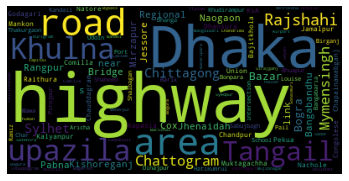

In [27]:
#Give our Rome corpus a variable name
_corpus = all_head

#Instantiate wordcloud object and use method to feed it our corpus
wc = WordCloud().generate_from_text(_corpus)

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc)
plt.axis('off')
plt.show()

In [38]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    mask = np.array(Image.open("bag_image.jpg"))
    wc = WordCloud(background_color="grey", mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  colormap='RdYlGn',
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("output_final.png")
    print("Word Cloud Saved Successfully")
    path="output_final.png"
    display(Image.open(path))

Word Cloud Saved Successfully


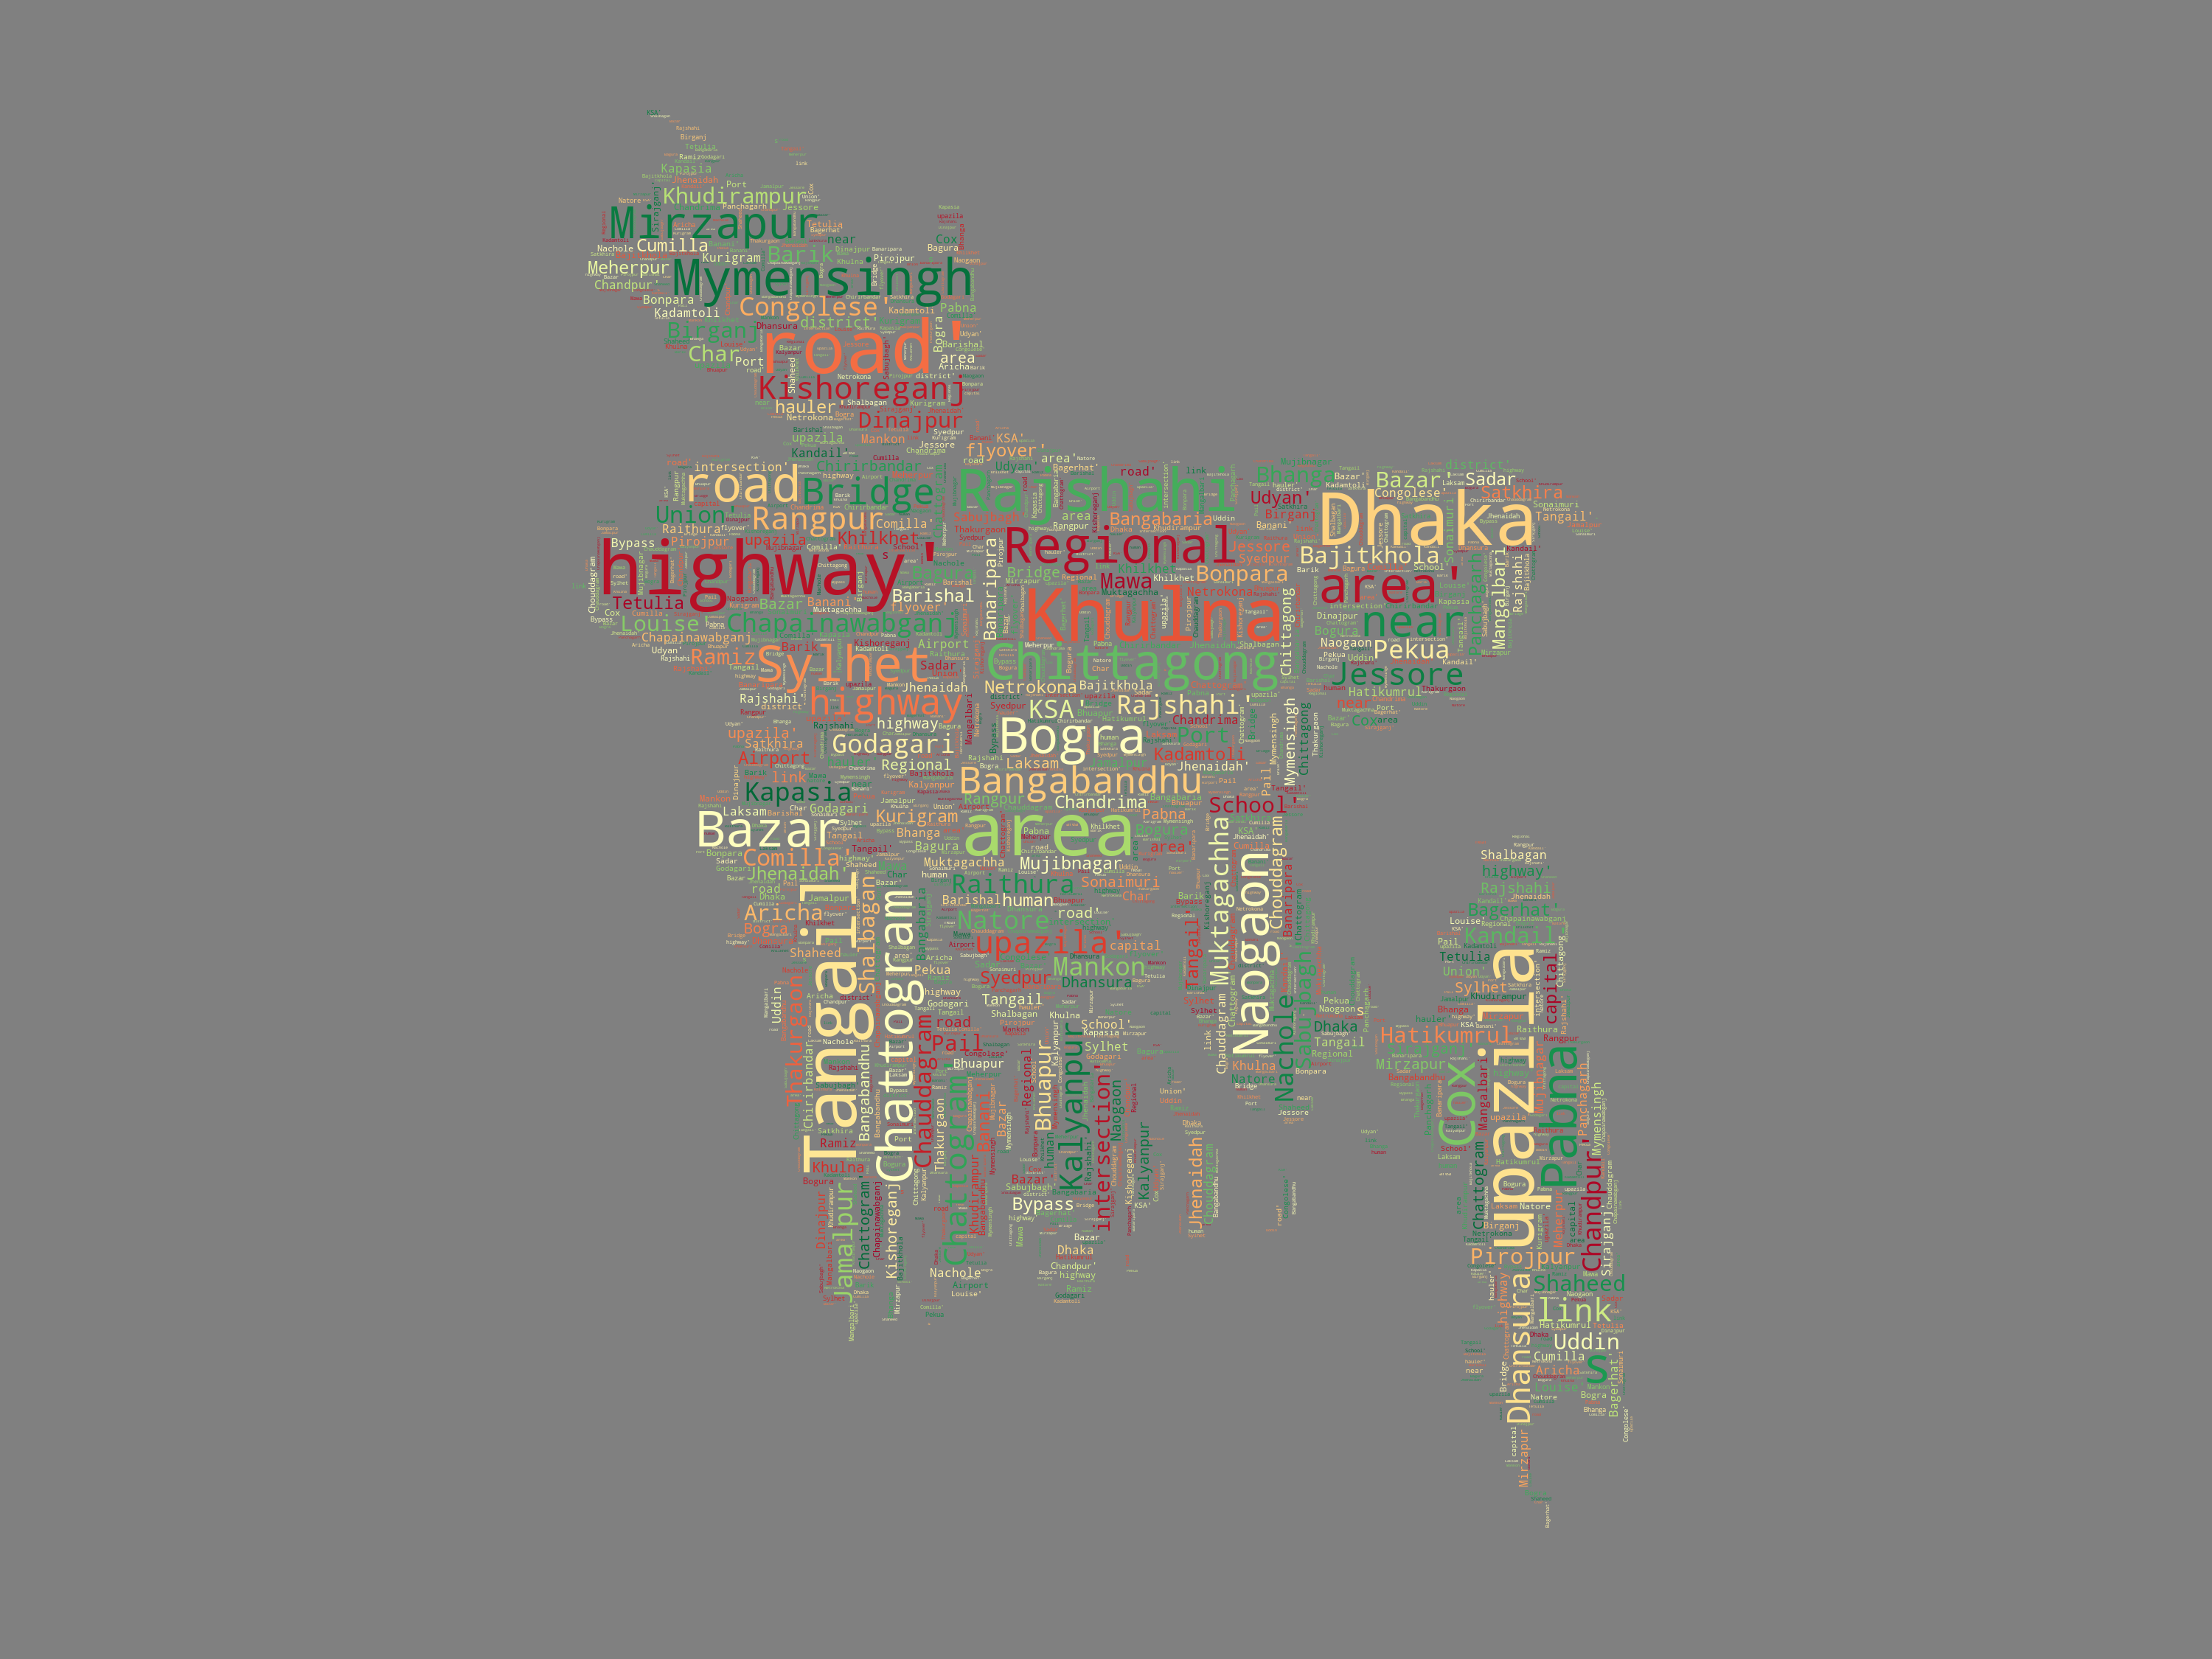

In [39]:
#Creating wordcloud for all tweets
create_wordcloud(headlines_2021)